In [89]:
import os
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

#### Chapter wise polarity analysis.

Let's create a dict with the chapter filenames as keys and the chapter text as values.

But first we need to replace the chapter names with the correct chapter order

In [90]:
# same function in test_eda.ipynb so need to put this in one place in the the scripts
def chapter_order(filename):

    book_number = filename.split('_')[0]
    chapter_number = filename.split('_')[2].zfill(2)
    new_name = book_number + '.' + chapter_number
    
    return new_name

In [91]:
# Combine all chapters to one list of chapter text
# one element of the list = one chapter

mb_dir = '../2_Text_Preprocessing/TMBD_Chapters_lemma'

mb_chapter_texts = {}

for filename in os.listdir(mb_dir):
    filepath =  os.path.join(mb_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        mb_chapter_texts[chapter_order(filename)] = chapter_text

In [92]:
# Combine all chapters to one list of chapter text
# one element of the list = one chapter

ir_dir = '../2_Text_Preprocessing/IR_Chapters_lemma'

ir_chapter_texts = {}

for filename in os.listdir(ir_dir):
    filepath =  os.path.join(ir_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        ir_chapter_texts[chapter_order(filename)] = chapter_text

now, create a list of chapter sentiments

In [93]:
# for the MB series

analyzer = SentimentIntensityAnalyzer()

mb_chapter_sentiments = {}

for chapter in mb_chapter_texts.keys():
    sentiment_score = analyzer.polarity_scores(mb_chapter_texts[chapter])
    mb_chapter_sentiments[chapter] = sentiment_score

In [94]:
# for the IR series

analyzer = SentimentIntensityAnalyzer()

ir_chapter_sentiments = {}

for chapter in ir_chapter_texts.keys():
    sentiment_score = analyzer.polarity_scores(ir_chapter_texts[chapter])
    ir_chapter_sentiments[chapter] = sentiment_score

Converting the scores in dataframes

In [95]:
mb_sentiment_df = pd.DataFrame(mb_chapter_sentiments).T
mb_sentiment_df.sort_index(inplace=True)
# encountering the same chapter numbering problem here.

In [96]:
ir_sentiment_df = pd.DataFrame(ir_chapter_sentiments).T
ir_sentiment_df.sort_index(inplace=True)

Plotting the sentiment scores now

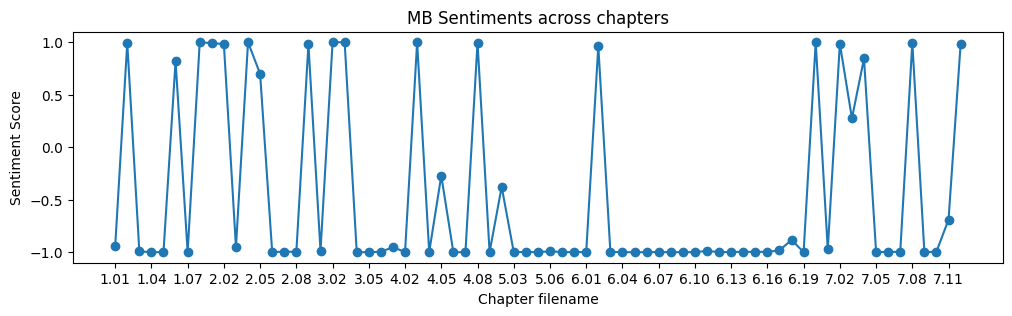

In [97]:
# MB series

fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(mb_sentiment_df.index, mb_sentiment_df['compound'], marker='o')
ax.set_title('MB Sentiments across chapters')
ax.set_xlabel('Chapter filename')
ax.set_ylabel('Sentiment Score')

plt.xticks(np.arange(0, 72 , step=3), 
           [mb_sentiment_df.index[x] for x in range(0, 72, 3)]);

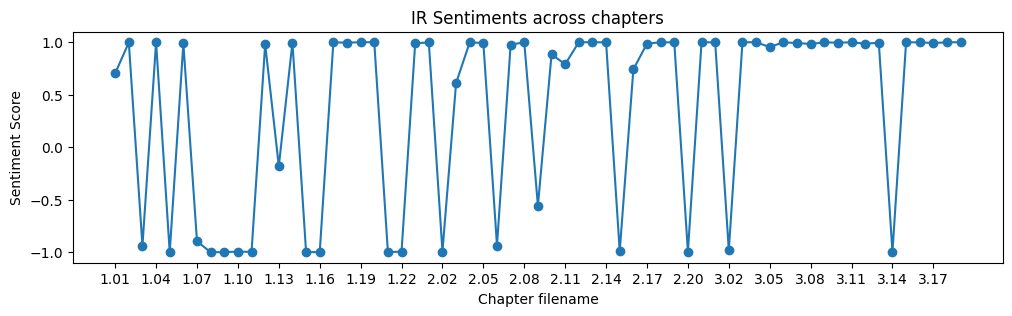

In [98]:
# IR series

fig, ax = plt.subplots(figsize=(12, 3))

plt.plot(ir_sentiment_df.index, ir_sentiment_df['compound'], marker='o')
plt.title('IR Sentiments across chapters')
plt.xlabel('Chapter filename')
plt.ylabel('Sentiment Score')

plt.xticks(np.arange(0, 62 , step=3), 
           [ir_sentiment_df.index[x] for x in range(0, 62, 3)]);

Okay before i move on, need to solve the chapter order problem. the figure above is really ugly but shows the problem that if i want to compare chapters i need to number them accordingly. tho ugly, i can see overall positive sentiment is there more in the IR series than MB series. which is very unexpected. i thought IR was more depressing. 

In [99]:
mb_sentiment_df['mb_chap_num'] = np.arange(1,len(mb_sentiment_df)+1)
mb_sentiment_df

,neg,neu,pos,compound,mb_chap_num
1.01,0.152,0.707,0.141,-0.9453,1
1.02,0.113,0.750,0.137,0.9929,2
1.03,0.139,0.749,0.112,-0.9920,3
1.04,0.158,0.733,0.109,-0.9994,4
1.05,0.167,0.705,0.127,-0.9991,5
...,...,...,...,...,...
7.08,0.119,0.733,0.148,0.9945,67
7.09,0.156,0.726,0.117,-0.9996,68
7.10,0.134,0.748,0.118,-0.9949,69
7.11,0.139,0.721,0.141,-0.6887,70


In [100]:
ir_sentiment_df['ir_chap_num'] = np.arange(1, len(ir_sentiment_df)+1)
ir_sentiment_df

,neg,neu,pos,compound,ir_chap_num
1.01,0.113,0.763,0.124,0.7029,1
1.02,0.104,0.765,0.131,0.9973,2
1.03,0.115,0.777,0.108,-0.9388,3
1.04,0.121,0.720,0.159,0.9993,4
1.05,0.166,0.702,0.131,-0.9990,5
...,...,...,...,...,...
3.15,0.117,0.700,0.184,0.9995,59
3.16,0.126,0.708,0.166,0.9983,60
3.17,0.145,0.695,0.160,0.9923,61
3.18,0.105,0.747,0.148,0.9986,62


In [101]:
merge_df = pd.merge(mb_sentiment_df[['mb_chap_num', 'compound']], 
                     ir_sentiment_df[['ir_chap_num', 'compound']], 
                     how='left', left_on='mb_chap_num',
                     right_on='ir_chap_num', 
                     suffixes=['_mb', '_ir'])
merge_df

,mb_chap_num,compound_mb,ir_chap_num,compound_ir
0,1,-0.9453,1.0,0.7029
1,2,0.9929,2.0,0.9973
2,3,-0.9920,3.0,-0.9388
3,4,-0.9994,4.0,0.9993
4,5,-0.9991,5.0,-0.9990
...,...,...,...,...
66,67,0.9945,NaN,NaN
67,68,-0.9996,NaN,NaN
68,69,-0.9949,NaN,NaN
69,70,-0.6887,NaN,NaN


In [102]:
merge_df['mb_chap_num'] = merge_df['mb_chap_num'].astype('float64')
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mb_chap_num  71 non-null     float64
 1   compound_mb  71 non-null     float64
 2   ir_chap_num  63 non-null     float64
 3   compound_ir  63 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


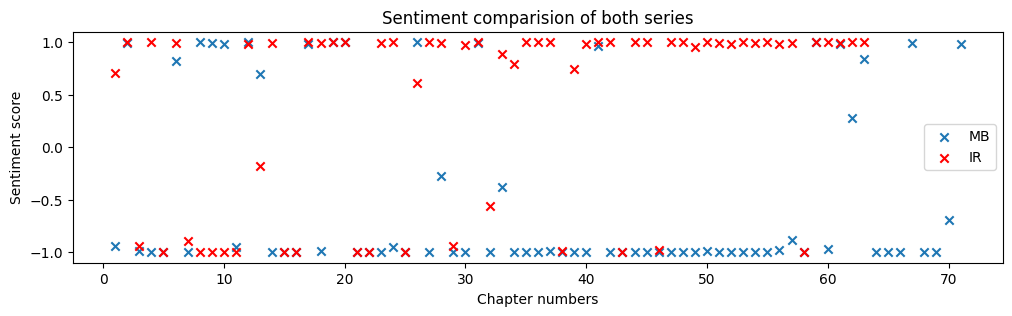

In [103]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.scatter(merge_df['mb_chap_num'], merge_df['compound_mb'], marker='x', label='MB')
ax.scatter(merge_df['ir_chap_num'], merge_df['compound_ir'], marker='x', color='red', label='IR')
ax.set_title('Sentiment comparision of both series')
ax.set_xlabel('Chapter numbers')
ax.set_ylabel('Sentiment score')
ax.legend()
plt.show();

#### Chapter wise Emotion detection (Lexicon Based approach)

We already have the chapterwise text dictionaries

In [104]:
from nrclex import NRCLex

In [105]:
# For MB series

mb_chapter_emotions_dict = {}

for chapter in mb_chapter_texts.keys():
    nrc = NRCLex(mb_chapter_texts[chapter])
    mb_chapter_emotions_dict[chapter] = nrc.affect_frequencies
    mb_chapter_emotions_dict[chapter]['top emotion'] = nrc.top_emotions[0][0]

In [106]:
# For IR series

ir_chapter_emotions_dict = {}

for chapter in ir_chapter_texts.keys():
    nrc = NRCLex(ir_chapter_texts[chapter])
    ir_chapter_emotions_dict[chapter] = nrc.affect_frequencies
    ir_chapter_emotions_dict[chapter]['top emotion'] = nrc.top_emotions[0][0]

In [107]:
# conversion to dataframes

mb_emotion_df = pd.DataFrame(mb_chapter_emotions_dict).T.sort_index().drop(columns='anticip')

ir_emotion_df = pd.DataFrame(ir_chapter_emotions_dict).T.sort_index().drop(columns='anticip')


<Axes: title={'center': 'MB top emotion in chapters'}, xlabel='top emotion', ylabel='number of chapters'>

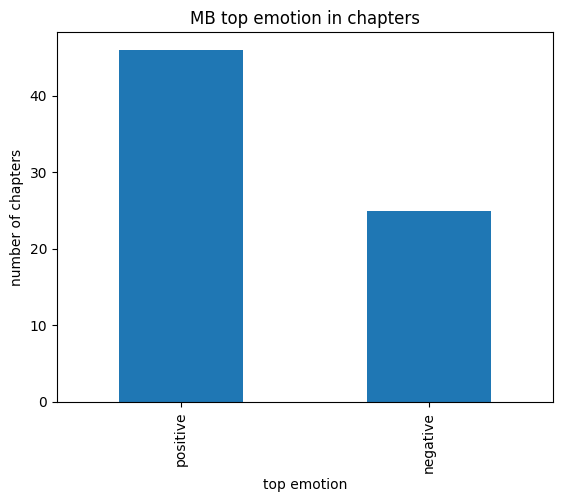

In [108]:
mb_emotion_df['top emotion'].value_counts().plot(kind='bar', title='MB top emotion in chapters',
                                                 xlabel='top emotion', ylabel='number of chapters')

<Axes: title={'center': 'IR top emotion in chapters'}, xlabel='top emotion', ylabel='number of chapters'>

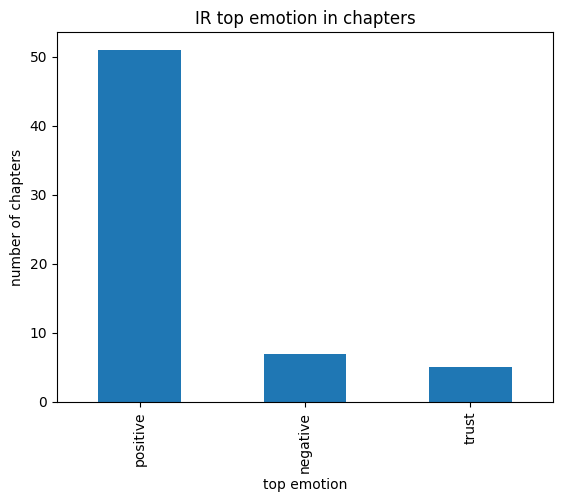

In [109]:
ir_emotion_df['top emotion'].value_counts().plot(kind='bar', title='IR top emotion in chapters',
                                                 xlabel='top emotion', ylabel='number of chapters')

Even with this, the IR series has more postive chapters. Lets dig a little deeper.

<Axes: >

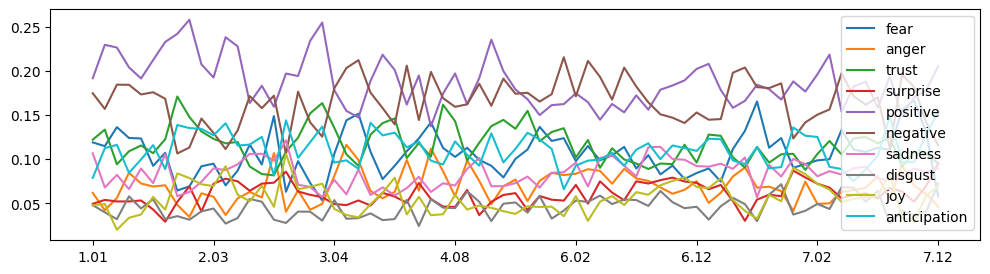

In [110]:
mb_emotion_df.plot(kind='line', figsize=(12,3))

<Axes: >

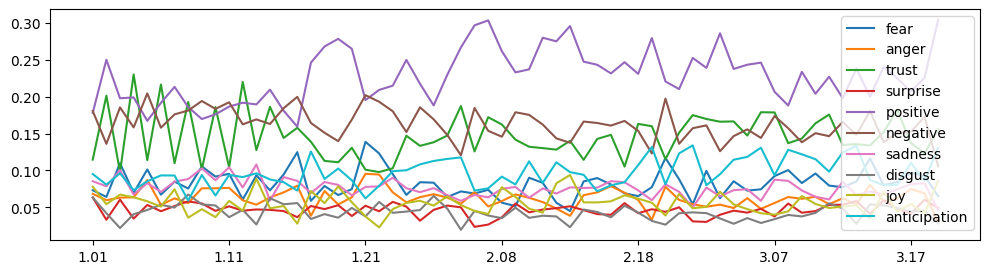

In [111]:
ir_emotion_df.plot(kind='line', figsize=(12,3))

IR series has a higher "trust" per chapter. whatever that means. 

Lets talk about MB's unfocused rage.

In [112]:
# to compare both series, we need equalize chapter numbers

mb_emotion_df['mb_chapters'] = np.arange(1, len(mb_emotion_df)+1)
ir_emotion_df['ir_chapters'] = np.arange(1, len(ir_emotion_df)+1)

mb_ir_anger = pd.merge(mb_emotion_df[['mb_chapters', 'anger']], 
                     ir_emotion_df[['ir_chapters', 'anger']], 
                     how='left', left_on='mb_chapters',
                     right_on='ir_chapters', 
                     suffixes=['_mb', '_ir'])

mb_ir_anger['mb_chapters'] = mb_ir_anger['mb_chapters'].astype('float64')
mb_ir_anger.head()

,mb_chapters,anger_mb,ir_chapters,anger_ir
0,1.0,0.061824,1.0,0.068293
1,2.0,0.042155,2.0,0.059735
2,3.0,0.056112,3.0,0.063187
3,4.0,0.084589,4.0,0.063609
4,5.0,0.07248,5.0,0.086993


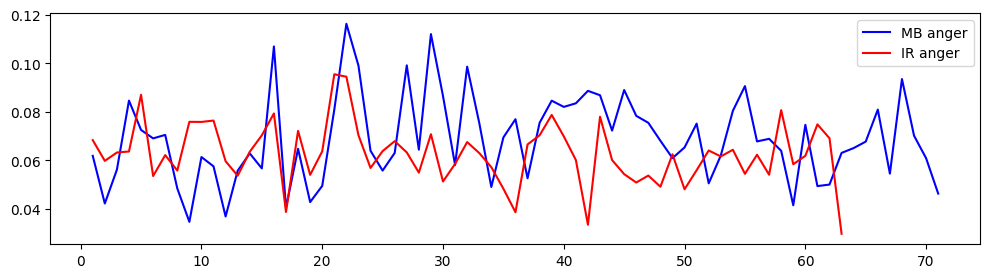

In [113]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(mb_ir_anger['mb_chapters'], mb_ir_anger['anger_mb'], color='blue', label='MB anger')
ax.plot(mb_ir_anger['mb_chapters'], mb_ir_anger['anger_ir'], color='red', label='IR anger')

ax.legend()

I do not know whose point of view is in the IR series but the MB series is mostly from MB's point of view so MB definitely has more unfocused rage than the person in IR series.

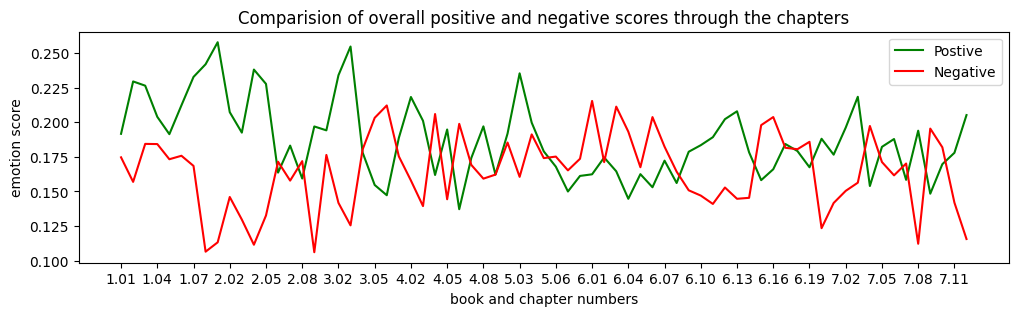

In [114]:
fig, ax = plt.subplots(figsize=(12,3))

ax.plot(mb_emotion_df.index, mb_emotion_df['positive'], label='Postive', color='green')
ax.plot(mb_emotion_df.index, mb_emotion_df['negative'], label='Negative', color='red')
ax.set_title('Comparision of overall positive and negative scores through the chapters')
ax.set_xlabel('book and chapter numbers')
ax.set_ylabel('emotion score')
ax.legend()

plt.xticks(np.arange(0, 72 , step=3), 
           [mb_emotion_df.index[x] for x in range(0, 72, 3)]);

So a few observations:
- there is usually an uptick in positive emotion score right at the end of each book. (except for fugitive telemetry (book 5) but thats separate from the main story narrative and is out of the main storyline so makes sense.)

- a similar downtick in the negative score when the book is about to end (exception, rogue protocol (book 3) probably because of miki's death?, and fugitive telemetry (book 5) which again isn't in the main story line)

- the overall trend of positive emotion goes slightly down as the books progress, which honestly isn't a surprise given the things and stress MB goes through. 

- the uptick at the end of book 1 and book 2 in positive emotions: the relief at the end of book 1 and the friendship gained in book 2.

- the overall trend of negative emotion goes slightly up as the book progress, which again makes sense. 

- the huge uptick in the negative emotion at the end of book 3: MB cared more about miki than i thought. 

- multiple upticks in negative emotion during the first half of book 6: the stress of the kidnapping then a little relief right around the time ART comes back then another uptick when MB is kidnapped again. 

- the huge downtick in negative score around chapter 8 in book 7, when MB and team are working on MB's idea. and the uptick that follows denoting the fight that came right after. 

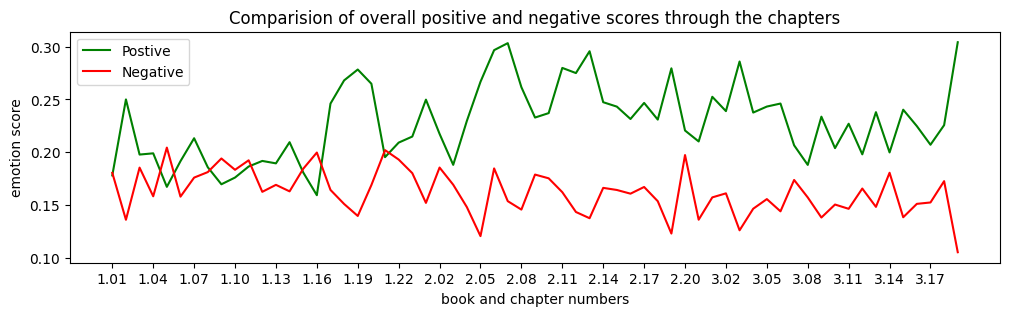

In [115]:
fig, ax = plt.subplots(figsize=(12,3))

ax.plot(ir_emotion_df.index, ir_emotion_df['positive'], label='Postive', color='green')
ax.plot(ir_emotion_df.index, ir_emotion_df['negative'], label='Negative', color='red')
ax.set_title('Comparision of overall positive and negative scores through the chapters')
ax.set_xlabel('book and chapter numbers')
ax.set_ylabel('emotion score')
ax.legend()

plt.xticks(np.arange(0, 62 , step=3), 
           [ir_emotion_df.index[x] for x in range(0, 62, 3)]);

Now i don't have the domain knowledge for this series. but a few observations:

- the overall trend of negative score throughout the series is decreasing.

- the overall trend of positive score throughout the series is increasing.

(both above observations are contrary to the MB series which i truly didn't think would be the case but i also agree with the MB trends.)

- a huge uptick in positive score at the end of book 1 (chapter 17 to 21). (and a similar downtick in negative score.)

- positive score through book 2 remains mostly consistent.

- biggest uptick in positive score at the end of book 3 and end of the series. 

(this also denotes that the series ended here conclusively. while for the MB series, the series is incomplete at the moment.)

Now we've done anger, positive and negative scores. lets do one more. joy. 

In [116]:
mb_ir_joy = pd.merge(mb_emotion_df[['mb_chapters', 'joy']], 
                     ir_emotion_df[['ir_chapters', 'joy']], 
                     how='left', left_on='mb_chapters',
                     right_on='ir_chapters', 
                     suffixes=['_mb', '_ir'])

mb_ir_joy['mb_chapters'] = mb_ir_joy['mb_chapters'].astype('float64')
mb_ir_joy.head()

,mb_chapters,joy_mb,ir_chapters,joy_ir
0,1.0,0.047913,1.0,0.078049
1,2.0,0.04918,2.0,0.054204
2,3.0,0.02004,3.0,0.067308
3,4.0,0.033604,4.0,0.063609
4,5.0,0.037373,5.0,0.058277


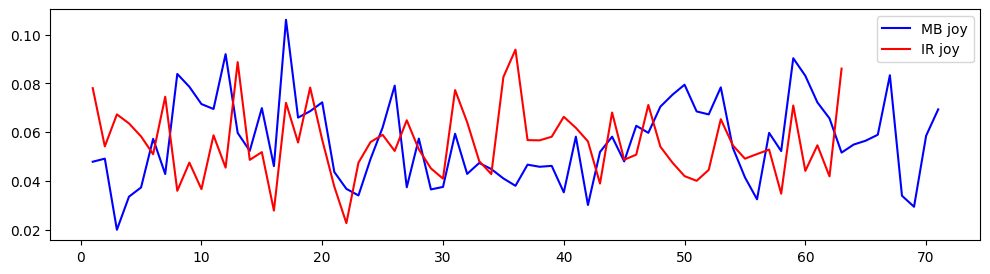

In [117]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(mb_ir_joy['mb_chapters'], mb_ir_joy['joy_mb'], color='blue', label='MB joy')
ax.plot(mb_ir_joy['mb_chapters'], mb_ir_joy['joy_ir'], color='red', label='IR joy')

ax.legend()

there are different patterns for both series, probably because of the different demarcation between books. 

- the downtick of joy in IR series around chapter number 20 (where book 1 ends and book 2 starts)

- a similar downtick around the same chapter number 20 for MB series (where book 3 ends and miki died.)

- IR series: uptick around chapter 35 (late part of book 2: corresponding to the postive score we saw earlier.)

- MB series: no uptick around chapter 35 (around the start of book 5 which is separate from the main storyline.)

- MB series: uptick around chapter number 50: (around the middle of book 6 when art came back.)

- IR series: downtick around chapter number 50: (around the middle of book 3; idk what event that signifies.)

Okay, thats it for lexicon based sentiment analysis for now. 